# langcgraph_intro
'07_langcgraph_intro.ipynb'

## 학습자료
- Langchain academy
- Officoal Documentation
- Teddy Note

# Langgraph
- State(상태) 기반 워크플로우 오케스트레이션 프레임워크
- 그래프 구조: Node(정점) / Edge(간선) 의 형태로 설계 & 실행 가능
- 조건 분기: 특정 node의 결과에 따라 다음 경로가 달라짐

In [1]:
%pip install langgraph


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Typed Dict 방식 -> 가벼움(힌트)

from typing_extensions import TypedDict

class State(TypedDict): # 원래 딕셔너리도 클래스에요
    graph_state : str 
    history : list

'''
#  Pydantic 방식 무거움 -> 검증
from pydantic import BaseModel

class State(BaseModel):
    graph_state: str

'''

# 걍 딕셔너리인데, 키 값에 대한 사전 정의 + value 의 타입을 설정함 (강제 X, 힌트 O)
s1 = State()
s1['graph_state'] = 'asdf'
s1

{'graph_state': 'asdf'}

In [16]:
# Node정의 (함수- state를 parameter로 받음)


def node_1(state: State) : 
    print('----Node1----')
    new_str = state['graph_state'] + 'I am'
    state['history'].append('node1')
    return {'graph_state': new_str}
    # return {'graph_state' : new_str, 'history': state['history']}

def node_2(state: State) : 
    print('----Node2----')
    new_str = state['graph_state'] + 'Happy'
    state['history'].append('node2')
    return {'graph_state': new_str}
    


def node_3(state: State) : 
    print('----Node3----')
    new_str = state['graph_state'] + 'Sad ! '
    state['history'].append('node3')
    return {'graph_state': new_str}
   



In [17]:
# 조건 분기 

# Literal -> 말 그대로. decide_mood 의 리턴은 반드시 'node_2', 'node_3' 라는 문자열이어야 한다.
## node 형식은 k-v형식 에서 

def decide_mood(state):
    user_input = state['graph_state']
    # 사용자 입력이 홀수면 node2 보내고 
    if len(user_input) % 2 :
        return 'node2'
    # 사용자 입력이 짝수면 node3 보내고
    else:
        return 'node3'

In [18]:
from IPython.display import Image, display 
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)

# node 형식은 k-v형식
builder.add_node('node1', node_1)
builder.add_node('node2', node_2)
builder.add_node('node3', node_3)


# 연결(Edge)
builder.add_edge(START,'node1')
builder.add_conditional_edges('node1', decide_mood)
builder.add_edge('node2',END)

# 그래프 빌드
graph = builder.compile()



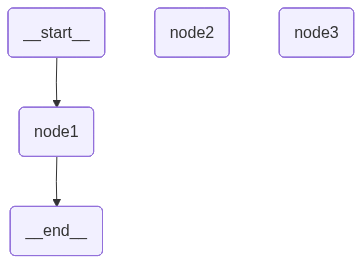

In [19]:
# 시각화 및 확인
display(Image(graph.get_graph().draw_mermaid_png())) 

In [20]:
graph.invoke({'graph_state': '안녕하세', 'history': []}) # ???


----Node1----
----Node3----


{'graph_state': '안녕하세I amSad ! ', 'history': ['node1', 'node3']}

In [15]:
from IPython.display import Image, display


# Graphviz를 사용하도록 변경
display(Image(graph.get_graph().draw_png()))

ImportError: Install pygraphviz to draw graphs: `pip install pygraphviz`.

----Node1----


NameError: name 'new_str' is not defined